In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="l5td9Ajri3iORKItEUfW")
project = rf.workspace("tanren").project("fire-extinguisher-detector-zd4m1")
version = project.version(2)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 107.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to fire-extinguisher-detector-2 in yolov8:: 100%|██████████| 552/552 [00:00<00:00, 6434.36it/s]


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.1 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

results = model.train(data='/content/fire-extinguisher-detector-2/data.yaml', epochs=50, imgsz=640)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/fire-extinguisher-detector-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=Fals

In [4]:
from google.colab import files
import os

print("Please upload your test image:")
uploaded = files.upload()

original_filename = list(uploaded.keys())[0]

file_extension = os.path.splitext(original_filename)[1]
simple_test_image_path = "test_image" + file_extension

os.rename(original_filename, simple_test_image_path)

print(f"---")
print(f"Success! Renamed '{original_filename}' to '{simple_test_image_path}'")

Please upload your test image:


Saving Fire-extinguishers-United-Kingdom.webp to Fire-extinguishers-United-Kingdom.webp
---
Success! Renamed 'Fire-extinguishers-United-Kingdom.webp' to 'test_image.webp'


In [6]:
from ultralytics import YOLO
import os

model = YOLO('runs/detect/train/weights/best.pt')

results = model.predict(
    simple_test_image_path,
    save=True,
    project='runs/detect',
    name='my_prediction'
)

output_image_path = f"runs/detect/my_prediction/{simple_test_image_path}"

print(f"Prediction complete. Output path is: {output_image_path}")


image 1/1 /content/test_image.webp: 640x480 2 fire_extinguishers, 49.7ms
Speed: 3.8ms preprocess, 49.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /content/runs/detect/my_prediction
Prediction complete. Output path is: runs/detect/my_prediction/test_image.webp


Displaying final result:


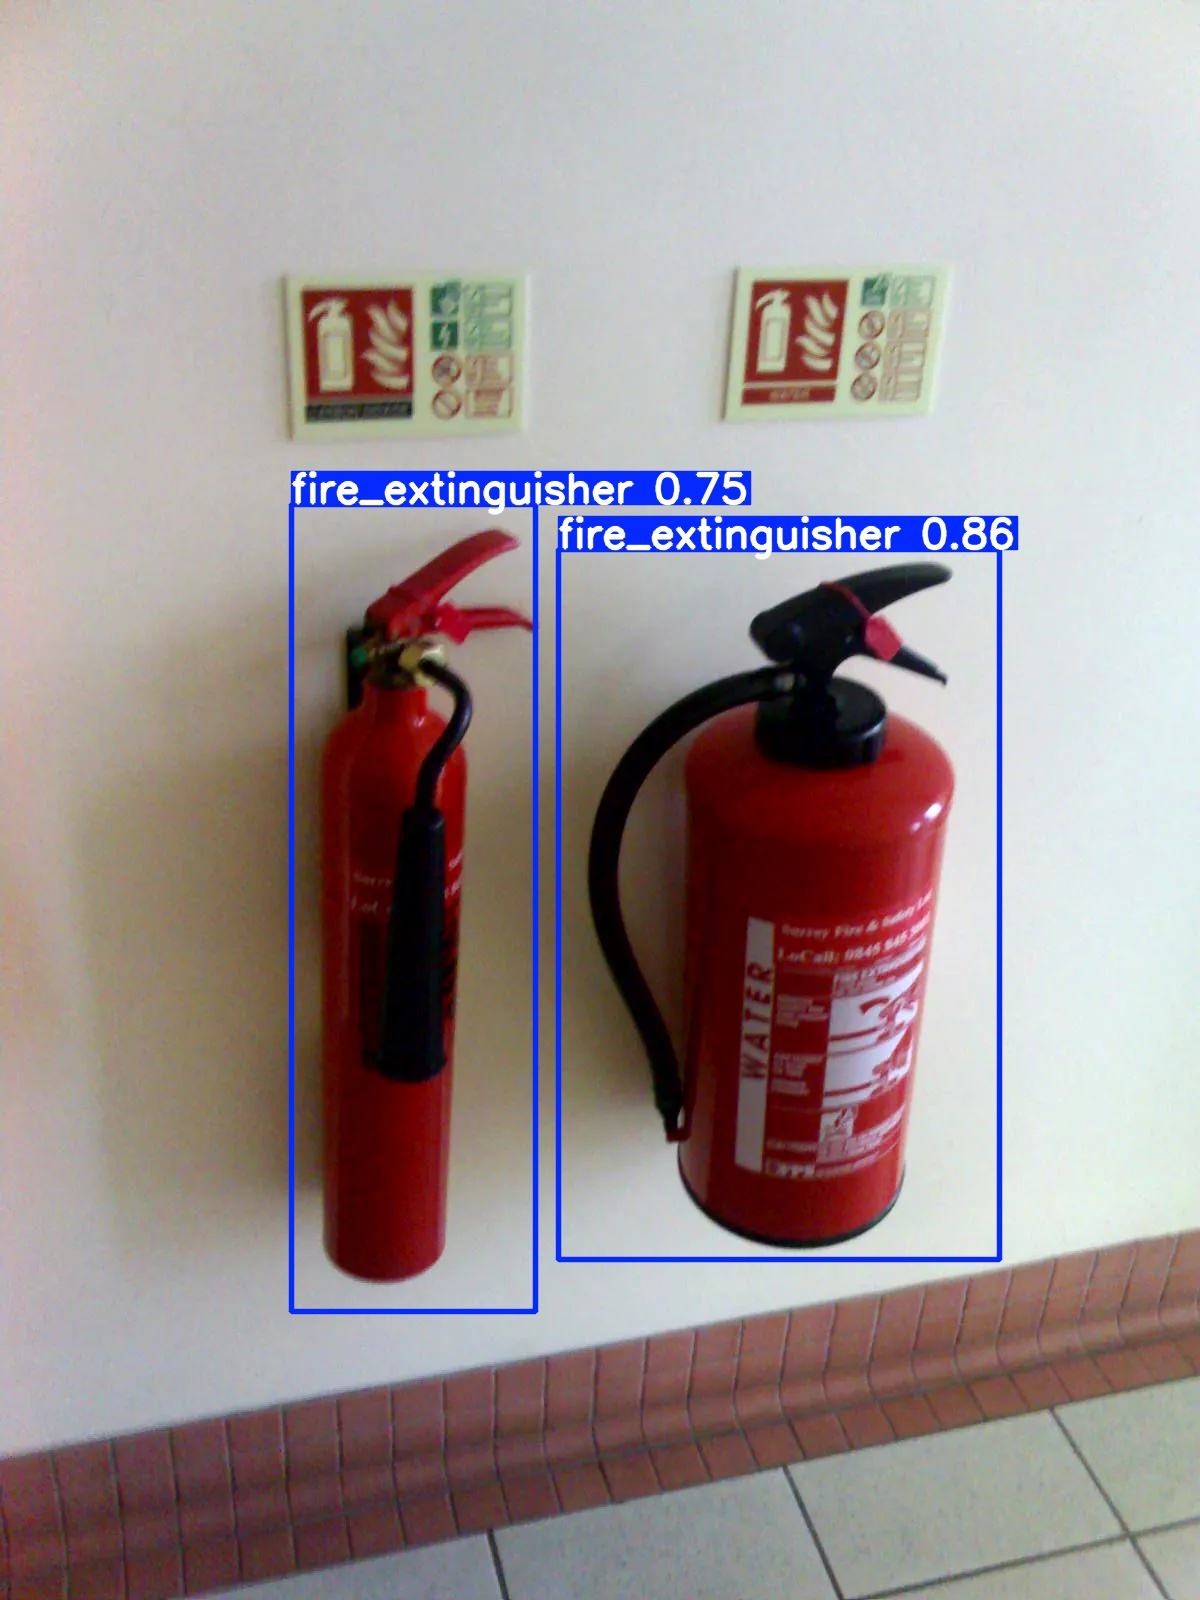

In [7]:
from PIL import Image as PIL_Image
from IPython.display import Image, display

output_image_jpg_path = "runs/detect/my_prediction/test_image.jpg"

print("Displaying final result:")
display(Image(filename=output_image_jpg_path))